In [ ]:
# import re

# for dirName in dirNames:
#   csv_list = glob(os.path.join(data_dir, dirName, '*.csv'))
#   for csvFile in csv_list:
#     # 파일명에 rain을 포함하는 파일찾기
#     count = csvFile.find('rain')
#     if count>0:
#       fileName = os.path.basename(csvFile)
#       print(csvFile)

#       df = pd.read_csv(csvFile, encoding='cp949')
#       fileFront = fileName.split('_')[0]
#       filterStr = re.sub(r'[0-9]', '', fileFront)
#       if filterStr=='aws':
#         # 지점 컬럼 삭제(불필요)
#         # AWS는 ASOS보다 지점 컬럼이 더 존재
#         df.drop(columns='지점', inplace=True)

#       # 결측치 0으로 채움
#       df.fillna(0, inplace=True)

#       # 한 시간 단위로 강수량 수정
#       time_list, hour_rain = rain_sum(df)

#       # pandas DataFrame 생성
#       value = {'일시':time_list, '강수량':hour_rain}

#       # 시간당 강수량을 저장하는 데이터프레임 생성
#       df2 = pd.DataFrame(value)

#       # 데이터형을 시간 타입으로 변경
#       df2['일시'] = pd.to_datetime(df2['일시'])

#       # 데이터 수집 기간 2020-1-1 0:00 ~ 2020-12-31 23:50
#       df2 = df2[df2['일시']>'2020-1-1 8:00']

#       df2.set_index(keys='일시', inplace=True, drop=True)
#       df2.to_csv(save_dir+fileName, mode='w', encoding='utf-8-sig')

In [ ]:
# # UTC Time -> Seoul Time
# def convTime(dt_str):
#   timeFormat = "%Y-%m-%d %H:%M"

#   # Create datetime object in local timezone
#   # 읽어올 시간의 포맷과 시간이 국제시간으로 설정
#   dt_utc = datetime.strptime(dt_str, timeFormat)
#   dt_utc = dt_utc.replace(tzinfo=pytz.UTC)

#   # Get local timezone
#   # 컴퓨터에서 서울시간으로 설정된 내용을 읽어옴
#   local_zone = tz.tzlocal()

#   # Convert timezone of datetime from UTC to local
#   # 읽어온 시간과 동일한 포맷으로 시간 문자열 생성
#   dt_local = dt_utc.astimezone(local_zone)
#   conv_time = dt_local.strftime(timeFormat)
#   return conv_time

In [ ]:
# # 위성 데이터 csv 파일에서 date, DSR, DSR_DQF1 컬럼만 선별적으로 가져옴
# data_dir = './sat_data/'
# save_dir = './data/'

# csv_list = glob(os.path.join(data_dir, '*.csv'))

# for csvFile in csv_list:

#   df = pd.read_csv(csvFile, encoding='cp949')
#   dropCol = ['Unnamed: 1', 'dim_y', 'dim_x', 'ASR',
#              'ASR_DQF1', 'RSR', 'RSR_DQF1', 'SW_DQF', 'gk2a_imager_projection']
#   df.drop(columns = dropCol, inplace=True)

#   # 결측치 0으로 채움
#   df.fillna(0, inplace=True)

#   # UTC -> Seoul Time
#   conv_time = list(map(convTime, df['date']))
#   df['date']=conv_time

#   # 컬럼명 수정 'date' -> '일시'
#   df.rename(columns = {'date':'일시'}, inplace=True)
#   df['일시'] = pd.to_datetime(df['일시'])
#   df.set_index(keys='일시', inplace=True, drop=True)

#   # 파일명만 가져옴
#   fileName = os.path.basename(csvFile)
#   df.to_csv(save_dir+fileName, mode='w', encoding='utf-8-sig')

In [ ]:
# # 세 개의 csv 파일 합치기
# data_dir = './data/'
# save_dir = './merge/'

# for i in range(0, len(match_df)):
#     # 하향 단파 복사
#     mergeFile = data_dir + match_df.iloc[i, 0]+'.csv'
#     merge_df = pd.read_csv(mergeFile, encoding='UTF-8')

#     # 강수량 정보 파일: '파일명2'
#     precipFile = data_dir + match_df.iloc[i, 4]
#     precip_df = pd.read_csv(precipFile, encoding='UTF-8')

#     # 기온, 풍향, 풍속, 습도 정보 파일(Aws, asos) : '파일명1'
#     awsFile = data_dir + match_df.iloc[i, 3]
#     aws_df = pd.read_csv(awsFile, encoding='UTF-8')

#     # 데이터 프레임간 합치기
#     # 위성 일사량 데이터가 중간 중간 누락 -> AWS, ASOS 데이터도 함께 삭제
#     # 데이터프레임 합치는 기준: 일사량 데이터 인덱스
#     merge_df = pd.merge(merge_df, precip_df, how='left', left_on='일시', right_on='일시')
#     merge_df = pd.merge(merge_df, aws_df, how='left', left_on='일시', right_on='일시')

#     # merge_df.set_index(keys='일시', inplace=True, drop=True)
#     merge_df.to_csv(save_dir + match_df.iloc[i, 0]+'.csv', mode='w', encoding='utf-8-sig')

In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.0f' % x)

df_ASOS = pd.read_csv("1extracted_data_10051700_10070340.csv")
df_SOLA = pd.read_csv("2020csv30T.csv")

df_ASOS = df_ASOS.iloc[:,[4,5,-1]]
df_SOLA = df_SOLA.iloc[13138:13474,[0,10, 14]]

df_new = []

In [2]:
for i in range(len(df_ASOS)):
    if ((str(df_ASOS["date"][i])[-2:]) == "00") or ((str(df_ASOS["date"][i])[-2:]) == "30") :
        df_new.append(df_ASOS.iloc[i,:])

df_asos = pd.DataFrame(df_new)
df_asos.reset_index(inplace=True, drop=True)
df_asos['date'] = pd.to_datetime(df_asos['date'], format='%Y%m%d%H%M')

df_asos

,DSR,DSR_DQF1,date
0,295,1,2020-10-01 00:00:00
1,278,1,2020-10-01 00:30:00
2,237,1,2020-10-01 01:00:00
3,384,1,2020-10-01 01:30:00
4,433,1,2020-10-01 02:00:00
...,...,...,...
324,NaN,NaN,2020-10-07 21:30:00
325,NaN,NaN,2020-10-07 22:00:00
326,NaN,NaN,2020-10-07 22:30:00
327,NaN,NaN,2020-10-07 23:00:00


In [3]:
df_sola = df_SOLA.reset_index(drop=True)
# df_sola = df_sola.drop('index', axis=1)
df_sola = df_sola.rename(columns={'시간':'date', '출력.1':'output', '외기(℃)':'temp'})
df_sola['date'] = pd.to_datetime(df_sola['date'], format='ISO8601')
# df_sola['date'] = pd.to_datetime(df_sola['date'], format='%Y%m%d%H%M')

df_sola

,date,output,temp
0,2020-10-01 00:00:00,0,0
1,2020-10-01 00:30:00,0,0
2,2020-10-01 01:00:00,0,0
3,2020-10-01 01:30:00,0,0
4,2020-10-01 02:00:00,0,0
...,...,...,...
331,2020-10-07 21:30:00,0,0
332,2020-10-07 22:00:00,0,0
333,2020-10-07 22:30:00,0,0
334,2020-10-07 23:00:00,0,0


In [4]:
df_total = pd.merge(df_asos, df_sola)
df_total = df_total.reset_index(drop=True)
# df_total.to_excel("a.xlsx")
merge_df = df_total
merge_df = merge_df.dropna()

In [5]:
X = merge_df.drop(columns=['output'])
y = merge_df['output']

In [6]:
X.shape, y.shape

((126, 4), (126,))

In [7]:
TRAIN_SPLIT = 80

In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler(feature_range = (0,1))

def normalize(X,y):
  X_norm = X.copy()

  for name in X:
      temp = X[name].to_numpy().reshape(-1,1)
      X_norm[name] = scaler.fit_transform(temp)

  temp = y.to_numpy().reshape(-1,1)
  y_norm = scaler.fit_transform(temp)

  return X_norm, y_norm

X_norm, ydata = normalize(X,y)
Xdata = X_norm.to_numpy()

ModuleNotFoundError: No module named 'sklearn'

In [43]:
import numpy as np

def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

In [45]:
sequence_length = 10
future_target = 1
# 다음 한 시간을 예측
STEP = 1

X_train, y_train = multivariate_data(Xdata, ydata, 0, TRAIN_SPLIT, sequence_length, future_target, STEP, single_step=True)
X_test, y_test = multivariate_data(Xdata, ydata, TRAIN_SPLIT, None, sequence_length, future_target, STEP, single_step=True)
X_train.shape, X_test.shape

((70, 10, 4), (35, 10, 4))

In [46]:
import tensorflow as tf

BATCH_SIZE = 28
BUFFER_SIZE = 1000

train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train)).cache().batch(BATCH_SIZE)
test_data = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(BATCH_SIZE)

In [47]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN, Bidirectional, Dropout

h_units = 100

inputs = Input(shape=(X_train.shape[-2:]))
x = LSTM(h_units, recurrent_dropout=0.5, kernel_initializer='he_normal')(inputs)
# x = LSTM(h_units, return_sequence=False, kernel_initializer='he_normal')(x)
x = Dropout(0.5)(x)

outputs = Dense(1)(x)

model = Model(inputs, outputs)

model.compile(loss='mse', metrics=['mae'], optimizer=tf.keras.optimizers.Adam(learning_rate=0.0006))

In [48]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau, ModelCheckpoint

# 'val_mae'를 기준으로 7epoch동안 val_mae 값이 줄어들지 않을 경우 기존의 learning_rate를 반으로 줄인다.
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=7)

# 'val_mae'가 20epoch동안 내려가지 않으면 학습을 중단한다.
es = EarlyStopping(monitor='val_mae', patience=20)

# 학습중에 'val_mae'가 가장 낮을 때 'best.h5'에 weight값을 저장한다.
mc = ModelCheckpoint('/content/drive/MyDrive/Capstone/test/nc/best.h5', monitor='val_mae', mode='auto', verbose=1, save_best_only=True)
callback = [reduce_lr, es, mc]

history = model.fit(train_data, epochs=150, batch_size=BATCH_SIZE, validation_data=test_data, callbacks=[callback])

Epoch 1/150
1/3 [=========>....................] - ETA: 5s - loss: 0.4178 - mae: 0.4975
Epoch 1: val_mae improved from inf to 0.24533, saving model to /content/drive/MyDrive/Capstone/test/nc/best.h5
3/3 [==============================] - 3s 207ms/step - loss: 0.2709 - mae: 0.4102 - val_loss: 0.1026 - val_mae: 0.2453 - lr: 6.0000e-04


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/150
1/3 [=========>....................] - ETA: 0s - loss: 0.2644 - mae: 0.3738
Epoch 2: val_mae improved from 0.24533 to 0.21171, saving model to /content/drive/MyDrive/Capstone/test/nc/best.h5
3/3 [==============================] - 0s 44ms/step - loss: 0.2166 - mae: 0.3582 - val_loss: 0.0805 - val_mae: 0.2117 - lr: 6.0000e-04
Epoch 3/150
1/3 [=========>....................] - ETA: 0s - loss: 0.1245 - mae: 0.2757
Epoch 3: val_mae improved from 0.21171 to 0.20862, saving model to /content/drive/MyDrive/Capstone/test/nc/best.h5
3/3 [==============================] - 0s 43ms/step - loss: 0.1736 - mae: 0.3287 - val_loss: 0.0778 - val_mae: 0.2086 - lr: 6.0000e-04
Epoch 4/150
1/3 [=========>....................] - ETA: 0s - loss: 0.1837 - mae: 0.3343
Epoch 4: val_mae did not improve from 0.20862
3/3 [==============================] - 0s 25ms/step - loss: 0.1632 - mae: 0.3185 - val_loss: 0.1120 - val_mae: 0.2746 - lr: 6.0000e-04
Epoch 5/150
1/3 [=========>....................] - ETA:

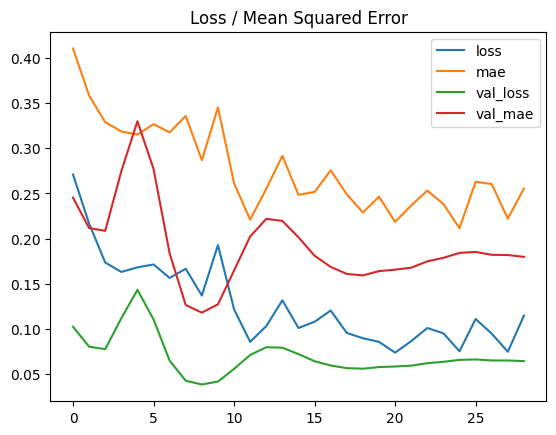

2/2 [==============================] - 0s 8ms/step


In [49]:
import matplotlib.pyplot as pyplot

model.load_weights('/content/drive/MyDrive/Capstone/test/nc/best.h5')

pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='loss')
pyplot.plot(history.history['mae'], label='mae')
pyplot.plot(history.history['val_loss'], label='val_loss')
pyplot.plot(history.history['val_mae'], label='val_mae')
pyplot.legend()
pyplot.show()

test_loss = model.evaluate(X_test, y_test)

y_pred = model.predict(X_test)

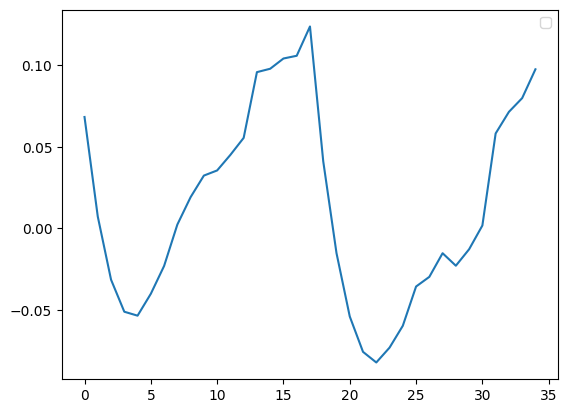

In [51]:
pyplot.plot(y_pred)
pyplot.legend()
pyplot.show()
